In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv("D:\\Learn\\DS102ML\\forest+fires\\processing_forestfires.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,1,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [269]:
class LinearRegression:
    def fit(self, X, y):
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta = inv_cov @ (X.T @ y)
    def predict(self, X):
        y_predict = self.theta.T @ X.T
        return y_predict
    def rmse(self,y_pred, y_test):
        rmse = np.square(y_pred - y_test).mean()**0.5
        return rmse

In [270]:
name_corr = []
for name in df.columns:
    if(df[name].dtypes == "float64" and name != "area"):
        name_corr.append(name)

In [271]:
name_corr

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'rain']

In [272]:
df_n = df[name_corr]

In [273]:
df_n

,FFMC,DMC,DC,ISI,temp,wind,rain
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0
...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,4.0,0.0


<Axes: >

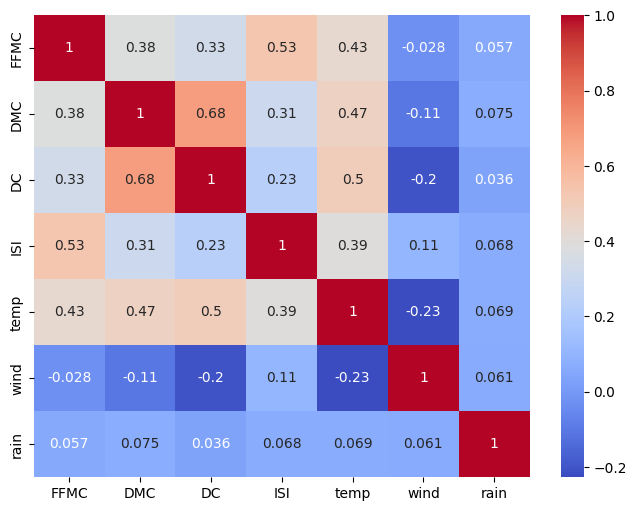

In [274]:
corr = df_n.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot = True, cmap ='coolwarm')

Ta thấy DMC và DC có độ tương quan cao (0.68), có thể gây ra đa cộng tuyến nên ta sẽ bỏ 1 trong 2

In [275]:
data = df.drop("DC", axis = "columns")

In [276]:
data = data.to_numpy()


In [277]:
train_size = int(0.8*len(df))
train_size

413

In [278]:
X_y_train = data[:train_size]

In [279]:
X_y_test = data[train_size:]

In [280]:
X_train = X_y_train[:,:11]
y_train = X_y_train[:,-1]

In [281]:
X_test = X_y_test[:,:11]
y_test = X_y_test[:,-1]

In [282]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print(f"RSME = {lr.rmse(y_predict,y_test)}")

RSME = 80.09289453931625


Ta sẽ đánh giá việc loại bỏ thuộc tính này có làm độ giải thích của mô hình không thông qua Adjusted R-squared

In [283]:
def adjusted_r2(y_test, y_predict, n, k):
    rss = sum((y_test_i - y_predict_i) ** 2 for y_test_i, y_predict_i in zip(y_test, y_predict))
    
    y_mean = sum(y_test) / len(y_test)
    tss = sum((y_test_i - y_mean) ** 2 for y_test_i in y_test)
    
    r2 = 1 - (rss / tss) if tss != 0 else 0 
    
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1)) if (n - k - 1) != 0 else r2 
    
    return adj_r2

In [284]:
n, k = X_test.shape
adj_r2 = adjusted_r2(y_test, y_predict, n, k)

In [285]:
adj_r2

np.float64(-0.1272967230242168)

RSME của dữ liệu gốc: 




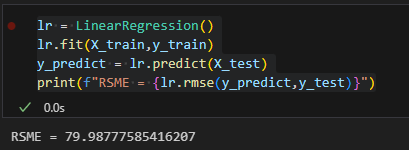

Adjusted R-squared của dữ liệu gốc:

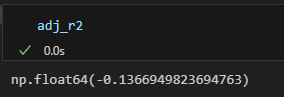

RSME của dữ liệu chưa được chuẩn hóa

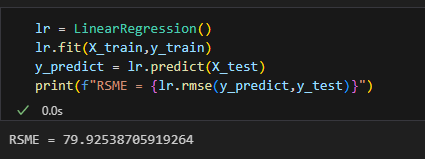

Adjusted R-squared của dữ liệu được chuẩn hóa

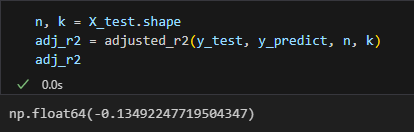

Ta có thể thấy RMSE tuy tăng nhẹ nhưng Adjusted R-Squared cũng tăng do đó ta có thể nói rằng loại bỏ thuộc tính này không làm giảm chất lượng mô hình quá nhiều nhưng giúp cho mô hình nhẹ hơn.